In [1]:
#From SAV to LOVE

### Выберите наборы данных. которые можно интерпретировать, как временные ряды:

а) зависимость цены на недвижимость в конкретном регионе от времени,

б) скорость полета самолета при перелете из аэропорта А в аэропорт В,

в) количество отказов компьютера,

г) число обращений в поликлинику по району,

д) координаты автобуса при движении по маршруту,

е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

 ### Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

###  Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

###  Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных и месячных группах для Brent.

###  Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с годовым.

## Задание № 1
 временной ряд а -т.к. прослеживается зависимость цены от времени.
б,в,г,д,е- количественные характеристики без привязки к времени, соотственно не временные ряд

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Задание № 2 

In [3]:
data = pd.read_csv("DUQ_hourly.csv", index_col=[0], parse_dates=[0])

In [4]:
data.head(7)

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0
2005-12-31 06:00:00,1372.0
2005-12-31 07:00:00,1402.0


In [5]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


Text(0, 0.5, 'Мегаватт')

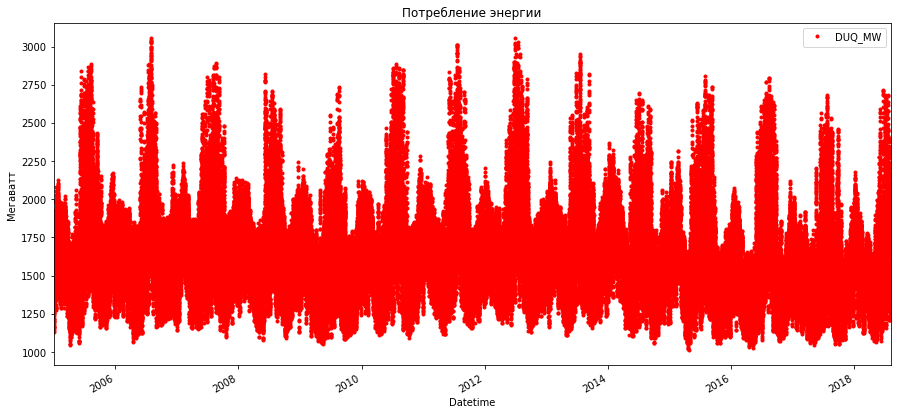

In [6]:
data.plot( style = '.', figsize = ( 15, 7 ), title = 'Потребление энергии', color ="r" )
plt.ylabel ( 'Мегаватт' )

In [7]:
# проверим на пустоты
data['DUQ_MW'].isnull().sum()

0

In [8]:
data['date'] = data.index
data_2012 = data.loc[np.logical_and( np.logical_and( data['date'].dt.year == 2012 , data['date'].dt.month == 10), data['date'].dt.day > 20  )]

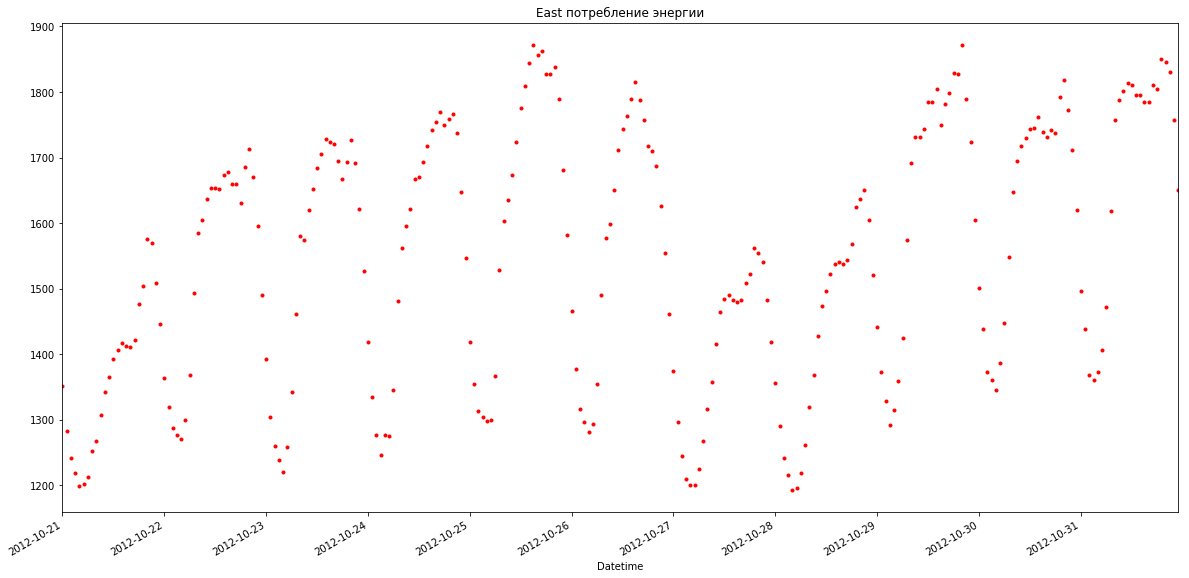

In [9]:
_ = data_2012['DUQ_MW'].plot( style='.', figsize=( 20, 10 ), title='East потребление энергии',color="r" )

In [10]:
data['date'] = data.index
data.head(7)

,DUQ_MW,date
Datetime,,
2005-12-31 01:00:00,1458.0,2005-12-31 01:00:00
2005-12-31 02:00:00,1377.0,2005-12-31 02:00:00
2005-12-31 03:00:00,1351.0,2005-12-31 03:00:00
2005-12-31 04:00:00,1336.0,2005-12-31 04:00:00
2005-12-31 05:00:00,1356.0,2005-12-31 05:00:00
2005-12-31 06:00:00,1372.0,2005-12-31 06:00:00
2005-12-31 07:00:00,1402.0,2005-12-31 07:00:00


In [11]:
ut = data['date'].unique()
print('всего уникальных значений:   ',ut.shape[0],' : кол-во наблюдений : ', data.shape[0])

всего уникальных значений:    119064  : кол-во наблюдений :  119068


In [12]:
count_data = data['date'].value_counts()
count_data.head(7)

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
2012-02-07 10:00:00    1
2016-09-01 10:00:00    1
Name: date, dtype: int64

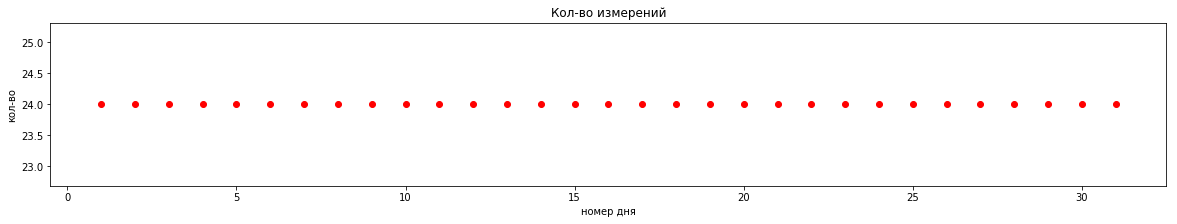

In [13]:
day_H=data['2016-12-01 00:00:00':'2016-12-31 23:00:00'].index.day

plt.figure(figsize=(20,3))
plt.plot(day_H.value_counts().index, day_H.value_counts().values ,'o', color="r")

plt.xlabel('номер дня')
plt.ylabel('кол-во')
plt.title('Кол-во измерений')
plt.show()

In [14]:
Day_count = day_H.value_counts() 
Day_count[Day_count != 24]

Series([], Name: Datetime, dtype: int64)

In [15]:
datetimean = data['2016-12-01 00:00:00':'2016-12-31 23:00:00']

C:\Users\79811\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


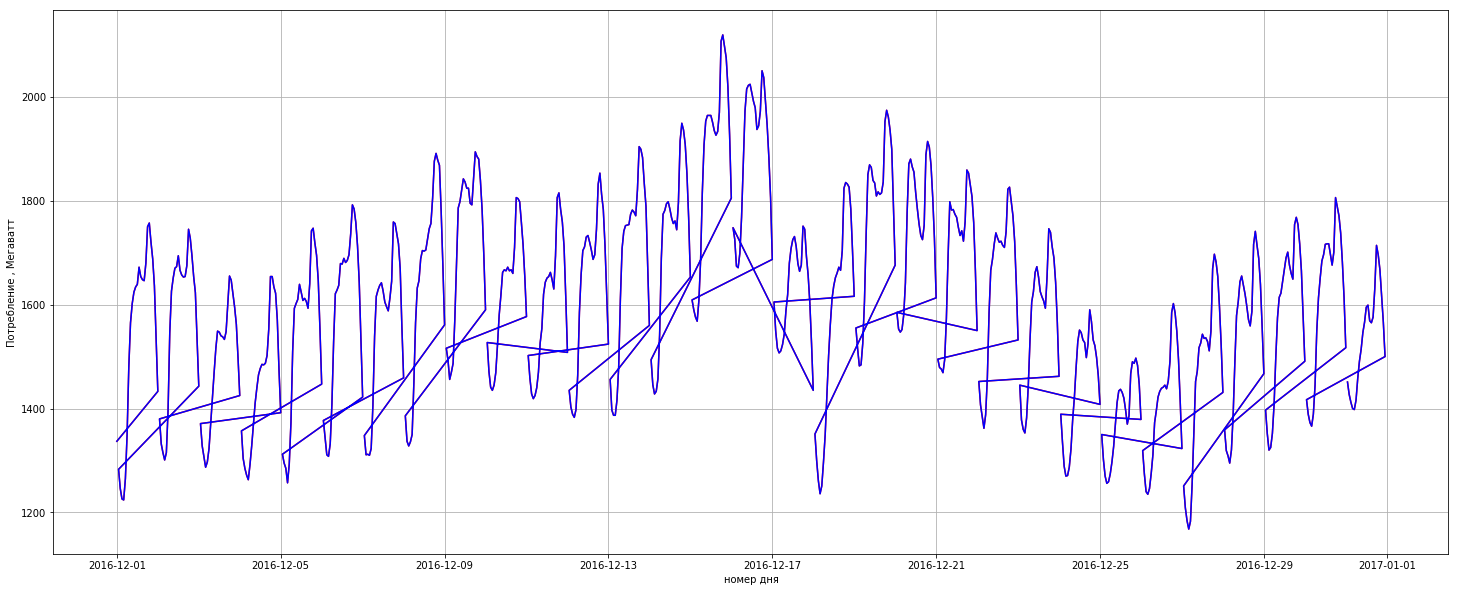

In [16]:
plt.figure(figsize=(25,10))
plt.plot(datetimean.index,datetimean['DUQ_MW'].values, 'r')
plt.plot(datetimean.index,datetimean['DUQ_MW'].values, 'b')
line_ = pd.to_datetime(pd.Series(['2016-12-01 00:00:00','2016-12-31 23:00:00']))
#plt.plot(line_,np.array([28000,33000]),'g')
plt.grid('on')
plt.xlabel('номер дня')
plt.ylabel('Потребление , Мегаватт')

plt.show()

In [17]:
data['2016-12-01 00:00:00':'2016-12-31 23:00:00'].head(31)

,DUQ_MW,date
Datetime,,
2016-12-31 01:00:00,1451.0,2016-12-31 01:00:00
2016-12-31 02:00:00,1427.0,2016-12-31 02:00:00
2016-12-31 03:00:00,1412.0,2016-12-31 03:00:00
2016-12-31 04:00:00,1400.0,2016-12-31 04:00:00
2016-12-31 05:00:00,1398.0,2016-12-31 05:00:00
2016-12-31 06:00:00,1416.0,2016-12-31 06:00:00
2016-12-31 07:00:00,1458.0,2016-12-31 07:00:00
2016-12-31 08:00:00,1491.0,2016-12-31 08:00:00
2016-12-31 09:00:00,1514.0,2016-12-31 09:00:00


## Выводы

1 Есть выбросы 
2 данные расположены в обратном порядке.

## Задание № 3

In [18]:
brent_data = pd.read_excel('brent.xlsx', index_col=[0], parse_dates=[0])
brent_data.head(7)

,Значение
Дата,
2020-10-30,37.45
2020-10-29,37.65
2020-10-28,39.12
2020-10-27,41.20
2020-10-26,40.46
2020-10-23,41.77
2020-10-22,42.46


In [19]:
#узнаем кол-во значений
brent_data.shape

(2735, 1)

In [20]:
#посмотрим индекс- он представлен в формате даты
brent_data.index

DatetimeIndex(['2020-10-30', '2020-10-29', '2020-10-28', '2020-10-27',
               '2020-10-26', '2020-10-23', '2020-10-22', '2020-10-21',
               '2020-10-20', '2020-10-19',
               ...
               '2010-11-12', '2010-11-11', '2010-11-10', '2010-11-09',
               '2010-11-08', '2010-11-05', '2010-11-04', '2010-11-03',
               '2010-11-02', '2010-11-01'],
              dtype='datetime64[ns]', name='Дата', length=2735, freq=None)

Text(0, 0.5, 'цена')

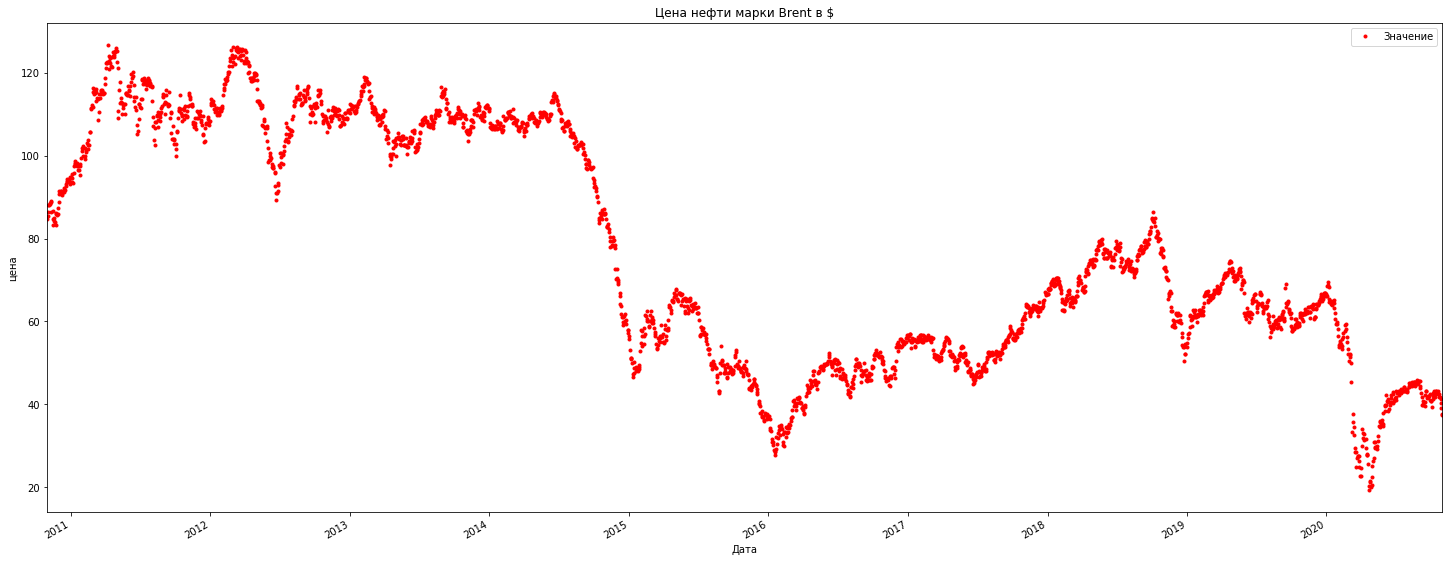

In [21]:
brent_data.plot( style = '.', figsize = ( 25, 10 ), title = 'Цена нефти марки Brent в $', color='r' )
plt.ylabel ( 'цена' )

In [22]:
MD = brent_data.resample("M").mean()

In [23]:
MW = brent_data.resample("W").mean()

In [24]:
MY = brent_data.resample("Y").mean()

Text(0, 0.5, 'Цена')

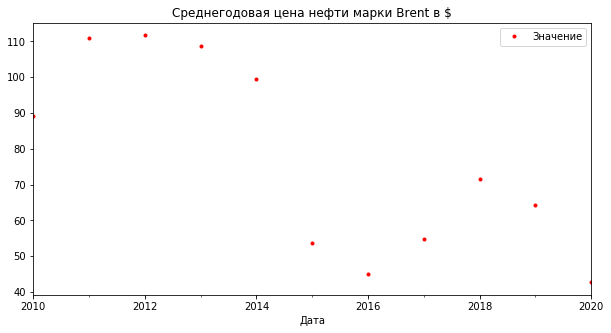

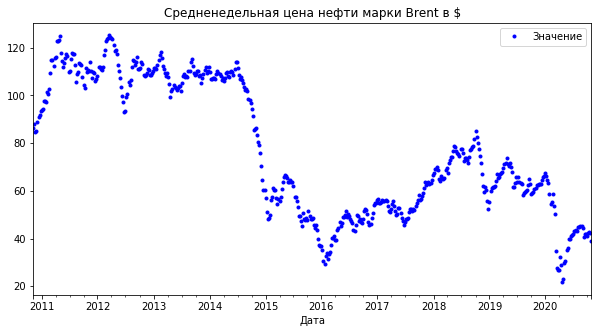

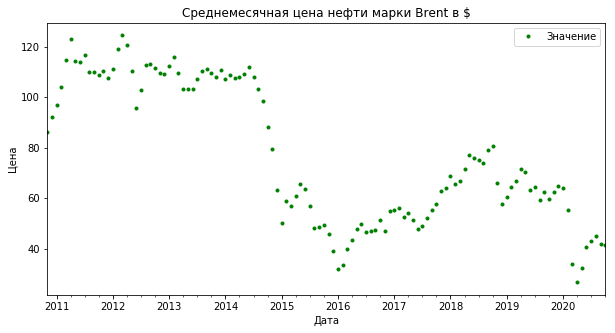

In [25]:
MY.plot( style = '.', figsize = ( 10, 5 ), title = "Среднегодовая цена нефти марки Brent в $", color='r' )
MW.plot( style = '.', figsize = ( 10, 5 ), title = 'Средненедельная цена нефти марки Brent в $', color='b' )
MD.plot( style = '.', figsize = ( 10, 5 ), title = 'Среднемесячная цена нефти марки Brent в $', color='g' )
plt.ylabel ( 'цена' )
plt.ylabel ( 'Цена' )

In [26]:
RM = brent_data.resample("M").std()

In [27]:
RW = brent_data.resample("W").std()

In [28]:
RY = brent_data.resample("Y").std()

Text(0, 0.5, 'Цена')

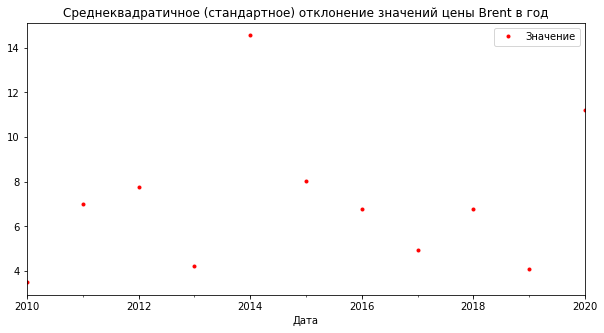

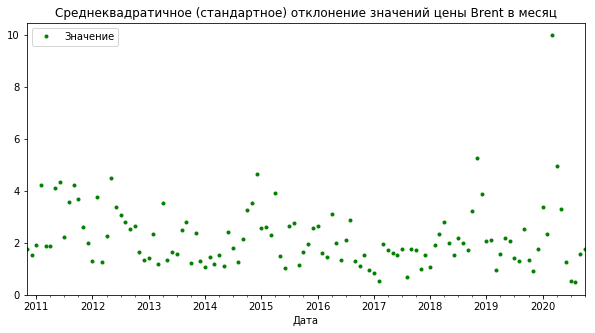

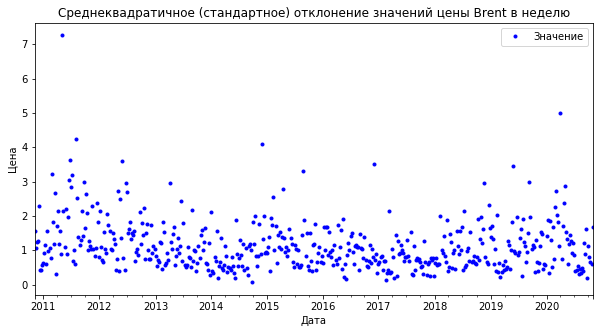

In [29]:

RY.plot( style = '.', figsize = ( 10, 5 ), title = 'Cреднеквадратичное (стандартное) отклонение значений цены Brent в год', color='r' )
RM.plot( style = '.', figsize = ( 10, 5 ), title = 'Cреднеквадратичное (стандартное) отклонение значений цены Brent в месяц', color='g' )
RW.plot( style = '.', figsize = ( 10, 5 ), title = 'Cреднеквадратичное (стандартное) отклонение значений цены Brent в неделю', color='b' )
plt.ylabel ( 'Цена' )

## Вывод

Прослеживаются четкие тенденции связанные с влиянием факторов глобального рынка и кризисов + ежегодные тенденции схожи